In [2]:
# This code is to make violin plots of LNG export terminal database
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DF = pd.read_excel("FinalTariffList.xlsx", engine='openpyxl', sheet_name='Tariff_by_Terminal', dtype={'Names': str})

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4493 non-null   int64  
 1   label           4493 non-null   object 
 2   Test            4493 non-null   bool   
 3   eiaid           4493 non-null   int64  
 4   In LNG File?    4493 non-null   int64  
 5   State           4493 non-null   object 
 6   County          4493 non-null   object 
 7   State-County    4493 non-null   object 
 8   LNG_Terminal    4493 non-null   object 
 9   Demand_Flat     2965 non-null   float64
 10  Demand_TOU      1064 non-null   float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      4493 non-null   float64
 13  Demand?         4493 non-null   object 
 14  Demand_Flat?    4493 non-null   object 
 15  Demand_TOU?     4493 non-null   object 
 16  Energy_TOU?     4493 non-null   object 
 17  Rate_Structure  4493 non-null   o

In [5]:
DF_ExcludeOutliers = DF[(DF['Energy_TOU'] < .2) & (DF['Energy_TOU'] > 0)]
#DF_ExcludeOutliers_Demand = DF[(DF['Energy_TOU'] < .3) & (DF['Energy_TOU'] > 0)]

In [6]:
DF_ExcludeOutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476 entries, 0 to 4492
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4476 non-null   int64  
 1   label           4476 non-null   object 
 2   Test            4476 non-null   bool   
 3   eiaid           4476 non-null   int64  
 4   In LNG File?    4476 non-null   int64  
 5   State           4476 non-null   object 
 6   County          4476 non-null   object 
 7   State-County    4476 non-null   object 
 8   LNG_Terminal    4476 non-null   object 
 9   Demand_Flat     2963 non-null   float64
 10  Demand_TOU      1062 non-null   float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      4476 non-null   float64
 13  Demand?         4476 non-null   object 
 14  Demand_Flat?    4476 non-null   object 
 15  Demand_TOU?     4476 non-null   object 
 16  Energy_TOU?     4476 non-null   object 
 17  Rate_Structure  4476 non-null   o

In [7]:
Existing_LNG_Terminal_Name = ['Sabine Pass', 'Cove Point', 'Elba Island', 'Corpus Christi', 'Cameron', 'Freeport', 'Golden Pass',
                             'Calcasieu Pass', 'Lake Charles LNG', 'Port Arthur LNG', 'Plaquemines LNG', 'Everett']

In [8]:
DF_Existing_Energy = DF_ExcludeOutliers[DF_ExcludeOutliers.LNG_Terminal.isin(Existing_LNG_Terminal_Name)]


In [9]:
DF_Existing_Energy.info()
DF_Existing_Energy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4217 entries, 0 to 4492
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4217 non-null   int64  
 1   label           4217 non-null   object 
 2   Test            4217 non-null   bool   
 3   eiaid           4217 non-null   int64  
 4   In LNG File?    4217 non-null   int64  
 5   State           4217 non-null   object 
 6   County          4217 non-null   object 
 7   State-County    4217 non-null   object 
 8   LNG_Terminal    4217 non-null   object 
 9   Demand_Flat     2804 non-null   float64
 10  Demand_TOU      989 non-null    float64
 11  Energy_Flat     0 non-null      float64
 12  Energy_TOU      4217 non-null   float64
 13  Demand?         4217 non-null   object 
 14  Demand_Flat?    4217 non-null   object 
 15  Demand_TOU?     4217 non-null   object 
 16  Energy_TOU?     4217 non-null   object 
 17  Rate_Structure  4217 non-null   o

,Unnamed: 0,label,Test,eiaid,In LNG File?,State,County,State-County,LNG_Terminal,Demand_Flat,...,Energy_TOU?,Rate_Structure,name,is_default,startdate,enddate,utility,sector,description,source
0,533,539f6adbec4f024411ec954d,True,16604,4182,TX,Bexar,TXBexar,Corpus Christi,NaN,...,Yes,Demand&Energy_TOU,ELP (Extra Large Power Service),NaN,2013-07-01 06:00:00,2014-02-01 06:00:00,"City of San Antonio, Texas (Utility Company)",Commercial,APPLICATION\nThis rate is applicable to altern...,http://www.cpsenergy.com/files/Rate_ExtraLarge...
1,909,539f6b64ec4f024411ec9c7b,True,1015,4170,TX,Travis,TXTravis,Corpus Christi,11.300,...,Yes,Demand_FLAT_Energy_TOU,Commercial - Primary Voltage Less than 3 MW - ...,NaN,2013-11-01 06:00:00,2014-12-31 00:00:00,Austin Energy,Commercial,NaN,http://austinenergy.com/wps/portal/ae/rates/el...
2,1082,539f6badec4f024411ec9fcb,True,55937,4162,TX,Jefferson,TXJefferson,Corpus Christi,6.725,...,Yes,Demand_FLAT_Energy_TOU,LIPS-TOU (Large Industrial Power Service Time-...,NaN,2013-01-01 06:00:00,2014-04-01 06:00:00,Entergy Texas Inc.,Commercial,This Schedule is applicable on a voluntary bas...,http://www.entergy-texas.com/content/price/tar...
3,1837,539f6cd8ec4f024411ecae8f,True,16604,4182,TX,Bexar,TXBexar,Corpus Christi,NaN,...,Yes,Demand&Energy_TOU,ELP (Extra Large Power Service),NaN,2014-02-01 06:00:00,2014-01-31 00:00:00,"City of San Antonio, Texas (Utility Company)",Commercial,APPLICATION\nThis rate is applicable to altern...,http://www.cpsenergy.com/files/Rates_docs/Rate...
4,2097,539f6d3cec4f024411ecb3c7,True,7370,4260,TX,Gonzales,TXGonzales,Corpus Christi,0.950,...,Yes,Demand_Dynamic_Energy_TOU,Large Industrial Demand > 3500 KW,NaN,2013-07-01 06:00:00,NaN,"City of Gonzales, Texas (Utility Company)",Industrial,*LP-3: Large Commercial & Industrial Demand > ...,http://www.cityofgonzales.org/Department%20Pag...


In [10]:
Energy_TOU = DF_Existing_Energy.Energy_TOU
Energy_Flat = DF_Existing_Energy.Energy_Flat
Demand_Flat = DF_Existing_Energy.Demand_Flat
Demand_TOU = DF_Existing_Energy.Demand_TOU
LNG_Terminal = DF_Existing_Energy.LNG_Terminal
Rate_Structure = DF_Existing_Energy.Rate_Structure

<ipython-input-11-91fd3d233a34>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


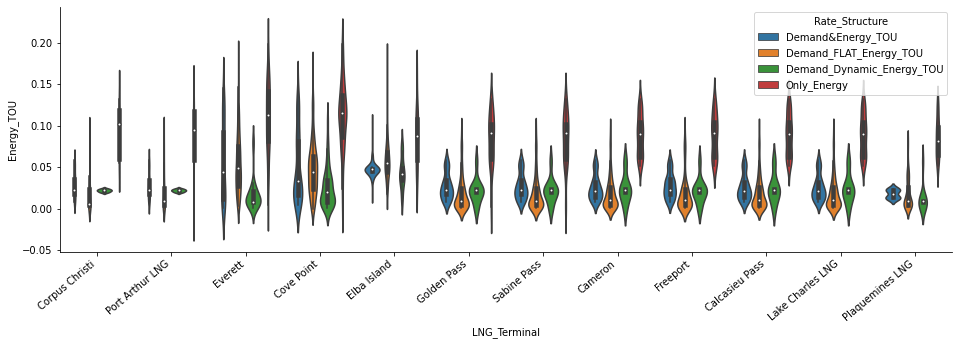

In [11]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
fig.set_size_inches(16, 4.5)
sns.violinplot(x=LNG_Terminal, y = Energy_TOU, data = DF_Existing_Energy, hue=Rate_Structure, ax=ax)
sns.despine()

In [19]:
# Break out into only a single tariff type "Demand_FLAT_Energy_TOU"
# The other three types that exist are "Demand&Energy_TOU", "Demand_Dynamic_Energy_TOU", "Only_Energy"
DF_Demand_Flat_Energy_TOU = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Demand_FLAT_Energy_TOU']
DF_DemandEnergy_TOU = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Demand&Energy_TOU']
DF_Only_Energy = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Only_Energy']
DF_Demand_Dynamic_Energy_TOU = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Demand_Dynamic_Energy_TOU']
DF_Demand_Flat_Energy_TOU.Rate_Structure.describe()

count                       2573
unique                         1
top       Demand_FLAT_Energy_TOU
freq                        2573
Name: Rate_Structure, dtype: object

In [20]:
DF_Demand_Flat_Energy_TOU.groupby("LNG_Terminal")['Energy_TOU'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,199.0,0.018285,0.019920,0.000510,0.003890,0.010150,0.025450,0.094700
1,Cameron,199.0,0.018285,0.019920,0.000510,0.003890,0.010150,0.025450,0.094700
2,Corpus Christi,130.0,0.016532,0.020760,0.000510,0.003890,0.005100,0.023070,0.094700
3,Cove Point,360.0,0.048991,0.031719,0.000065,0.023600,0.044567,0.063825,0.169600
4,Elba Island,161.0,0.058370,0.024273,0.017120,0.044230,0.054650,0.068393,0.181667
5,Everett,507.0,0.054810,0.034514,0.002610,0.027315,0.049087,0.075710,0.182699
6,Freeport,157.0,0.018041,0.021643,0.000510,0.003890,0.010130,0.023560,0.094700
7,Golden Pass,195.0,0.018307,0.020949,0.000510,0.003890,0.009560,0.024600,0.094700
8,Lake Charles LNG,199.0,0.018285,0.019920,0.000510,0.003890,0.010150,0.025450,0.094700
9,Plaquemines LNG,125.0,0.017147,0.017627,0.001560,0.003890,0.008800,0.026640,0.081000


In [21]:
DF_Existing_Energy.groupby("LNG_Terminal")['Demand_Flat'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,210.0,6.776063,3.527311,0.520,5.2000,6.580,8.456667,19.15
1,Cameron,210.0,6.776063,3.527311,0.520,5.2000,6.580,8.456667,19.15
2,Corpus Christi,137.0,6.970189,3.290029,0.950,5.0500,6.815,8.940000,15.00
3,Cove Point,433.0,8.022875,5.305043,0.165,3.2700,7.000,11.395000,22.16
4,Elba Island,191.0,7.851575,5.371236,-5.560,3.6200,6.500,12.340000,19.01
5,Everett,548.0,12.059546,25.656046,0.420,5.7600,8.520,11.655000,245.22
6,Freeport,167.0,7.046233,3.471871,0.950,5.4175,6.725,8.207500,19.15
7,Golden Pass,205.0,6.747606,3.461813,0.520,5.2000,6.580,8.456667,19.15
8,Lake Charles LNG,210.0,6.776063,3.527311,0.520,5.2000,6.580,8.456667,19.15
9,Plaquemines LNG,135.0,6.489691,3.322581,0.520,5.4175,6.435,7.190000,19.15


In [22]:
DF_Existing_Energy.groupby(["LNG_Terminal",'Rate_Structure']).size()

LNG_Terminal      Rate_Structure           
Calcasieu Pass    Demand&Energy_TOU             65
                  Demand_Dynamic_Energy_TOU     11
                  Demand_FLAT_Energy_TOU       199
                  Only_Energy                   47
Cameron           Demand&Energy_TOU             65
                  Demand_Dynamic_Energy_TOU     11
                  Demand_FLAT_Energy_TOU       199
                  Only_Energy                   47
Corpus Christi    Demand&Energy_TOU             65
                  Demand_Dynamic_Energy_TOU      7
                  Demand_FLAT_Energy_TOU       130
                  Only_Energy                   17
Cove Point        Demand&Energy_TOU            101
                  Demand_Dynamic_Energy_TOU     73
                  Demand_FLAT_Energy_TOU       360
                  Only_Energy                  111
Elba Island       Demand&Energy_TOU             59
                  Demand_Dynamic_Energy_TOU     30
                  Demand_FLAT_Energy_T

In [23]:
DF_Existing_Energy.groupby(["Rate_Structure"]).size()

Rate_Structure
Demand&Energy_TOU             758
Demand_Dynamic_Energy_TOU     231
Demand_FLAT_Energy_TOU       2573
Only_Energy                   655
dtype: int64

In [24]:
# Look at single tariff type "Demand_FLAT_Energy_TOU" by energy TOU by county
DF_Demand_Flat_Energy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).head(20)

,State-County,count,mean,std,min,25%,50%,75%,max
83,PAAllegheny,1.0,0.001557,NaN,0.001557,0.001557,0.001557,0.001557,0.001557
24,LAAcadia Parish,7.0,0.001560,2.342144e-19,0.001560,0.001560,0.001560,0.001560,0.001560
100,TXCass,30.0,0.003550,9.965458e-06,0.003542,0.003542,0.003542,0.003562,0.003562
29,LAPlaquemines Parish,90.0,0.005035,2.638850e-03,0.002580,0.002580,0.002580,0.007840,0.007840
105,TXJefferson,413.0,0.005975,5.308534e-03,0.003890,0.003890,0.003890,0.004065,0.019650
31,LARapides Parish,35.0,0.006262,4.697124e-05,0.006206,0.006206,0.006300,0.006300,0.006300
10,FLBay,7.0,0.008816,7.237370e-04,0.007500,0.008585,0.008800,0.009260,0.009720
48,MEHancock,12.0,0.009360,2.586869e-03,0.005950,0.005950,0.010380,0.011650,0.011850
108,TXTravis,488.0,0.012399,1.087303e-02,0.000510,0.001520,0.010130,0.019970,0.054530
25,LACalcasieu Parish,84.0,0.013056,2.732094e-03,0.010340,0.010340,0.013000,0.015793,0.015793


In [17]:
# Look at single tariff type "Demand_FLAT_Energy_TOU" by Demand Flat by county
DF_GroupBy = DF_Demand_Flat_Energy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean'])

In [18]:
DF_GroupBy.head()

,State-County,count,mean,std,min,25%,50%,75%,max
83,PAAllegheny,1.0,0.001557,NaN,0.001557,0.001557,0.001557,0.001557,0.001557
24,LAAcadia Parish,7.0,0.001560,2.342144e-19,0.001560,0.001560,0.001560,0.001560,0.001560
100,TXCass,30.0,0.003550,9.965458e-06,0.003542,0.003542,0.003542,0.003562,0.003562
29,LAPlaquemines Parish,90.0,0.005035,2.638850e-03,0.002580,0.002580,0.002580,0.007840,0.007840
105,TXJefferson,414.0,0.005970,5.303093e-03,0.003890,0.003890,0.003890,0.004065,0.019650


In [19]:
DF_GroupBy.to_excel("Demand_Flat_Energy_TOU-Energy_TOU_by_county.xlsx")

In [20]:
# Break out into only a single tariff type "Demand_Dynamic_Energy_TOU"
DF_Demand_Dynamic_Energy_TOU = DF_Existing_Energy[(DF_Existing_Energy['Rate_Structure'])=='Demand_Dynamic_Energy_TOU']
DF_Demand_Dynamic_Energy_TOU.Rate_Structure.describe()

count                           231
unique                            1
top       Demand_Dynamic_Energy_TOU
freq                            231
Name: Rate_Structure, dtype: object

In [28]:
DF_Demand_Dynamic_Energy_TOU.groupby("LNG_Terminal")['Energy_TOU'].describe().reset_index()


In [22]:
DF_Demand_Dynamic_Energy_TOU.groupby("LNG_Terminal")['Demand_Flat'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,11.0,4.788182,7.194329,0.9500,0.950000,0.970,3.8300,19.150000
1,Cameron,11.0,4.788182,7.194329,0.9500,0.950000,0.970,3.8300,19.150000
2,Corpus Christi,7.0,0.958571,0.010690,0.9500,0.950000,0.950,0.9700,0.970000
3,Cove Point,73.0,8.775593,5.455001,0.5706,2.206700,10.905,11.3950,21.922000
4,Elba Island,30.0,2.202336,3.478657,-5.5600,1.314325,1.490,3.0000,10.895667
5,Everett,41.0,10.553885,3.173844,1.7043,10.650000,10.975,11.3950,19.020000
6,Freeport,10.0,4.831000,7.582012,0.9500,0.950000,0.970,2.7175,19.150000
7,Golden Pass,10.0,4.831000,7.582012,0.9500,0.950000,0.970,2.7175,19.150000
8,Lake Charles LNG,11.0,4.788182,7.194329,0.9500,0.950000,0.970,3.8300,19.150000
9,Plaquemines LNG,10.0,5.827000,7.029693,2.0000,2.380000,2.510,3.1325,19.150000


In [23]:
DF_Demand_Dynamic_Energy_TOU.groupby("LNG_Terminal")['Demand_TOU'].describe().reset_index()

,LNG_Terminal,count,mean,std,min,25%,50%,75%,max
0,Calcasieu Pass,11.0,5.890000,3.135427,0.950000,4.37500,7.2500,7.57000,9.680
1,Cameron,11.0,5.890000,3.135427,0.950000,4.37500,7.2500,7.57000,9.680
2,Corpus Christi,7.0,7.387143,0.171047,7.250000,7.25000,7.2500,7.57000,7.570
3,Cove Point,73.0,8.738574,5.606406,0.475000,3.43000,8.5000,13.48000,19.800
4,Elba Island,30.0,4.605179,3.884365,0.875000,2.03875,2.3175,7.81250,15.250
5,Everett,41.0,11.040004,3.738293,3.366667,7.87000,12.5900,13.88750,14.945
6,Freeport,10.0,5.511000,3.027806,0.950000,2.93750,7.2500,7.49000,7.570
7,Golden Pass,10.0,5.511000,3.027806,0.950000,2.93750,7.2500,7.49000,7.570
8,Lake Charles LNG,11.0,5.890000,3.135427,0.950000,4.37500,7.2500,7.57000,9.680
9,Plaquemines LNG,10.0,4.471000,2.726117,0.950000,2.29250,4.8025,5.11125,8.890


In [24]:
# Look at single tariff type "Demand_Dynamic_Energy_TOU" by energy TOU by county
DF_Demand_Dynamic_Energy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).head(20)


,State-County,count,mean,std,min,25%,50%,75%,max
6,LAAcadia Parish,14.0,0.001560,0.000000,0.001560,0.001560,0.001560,0.001560,0.001560
2,FLBay,7.0,0.008816,0.000724,0.007500,0.008585,0.008800,0.009260,0.009720
10,MEHancock,1.0,0.009950,NaN,0.009950,0.009950,0.009950,0.009950,0.009950
15,NJHudson,62.0,0.014447,0.018572,0.007900,0.007900,0.007900,0.007900,0.082477
19,VAAmelia,2.0,0.014620,0.015068,0.003965,0.009292,0.014620,0.019947,0.025275
8,MANorfolk,5.0,0.021130,0.000556,0.020420,0.020780,0.021280,0.021290,0.021880
18,TXGonzales,56.0,0.021886,0.001496,0.019900,0.019900,0.022100,0.023800,0.023800
9,MDAllegany,3.0,0.023247,0.017159,0.003685,0.016993,0.030300,0.033028,0.035755
20,VACarroll,16.0,0.025316,0.011968,0.005520,0.022445,0.030630,0.032708,0.036050
16,NJMiddlesex,8.0,0.032956,0.026474,0.000600,0.023001,0.030468,0.040423,0.070290


In [30]:
DF_Demand_Dynamic_Energy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).to_excel("Demand_Dynamic_Energy_TOU-Energy_TOU_by_county.xlsx")

In [31]:
# Look at single tariff type "Demand&Energy_TOU" by energy TOU by county
DF_DemandEnergy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).head(20)


,State-County,count,mean,std,min,25%,50%,75%,max
30,NJHudson,12.0,0.008000,1.811860e-18,0.008000,0.008000,0.008000,0.008000,0.008000
16,MEHancock,5.0,0.008862,2.835987e-03,0.005820,0.005820,0.009950,0.011360,0.011360
38,VACarroll,5.0,0.011632,1.447196e-02,0.005100,0.005100,0.005220,0.005220,0.037520
0,ARChicot,24.0,0.014280,3.075516e-03,0.012162,0.012162,0.013492,0.013492,0.020880
34,SCOrangeburg,1.0,0.016500,NaN,0.016500,0.016500,0.016500,0.016500,0.016500
14,MAWorcester,6.0,0.018188,1.812866e-02,0.005775,0.006855,0.006855,0.030019,0.045050
37,TXTravis,224.0,0.020912,1.068312e-02,0.007910,0.009837,0.017143,0.031377,0.034630
17,MSJackson,4.0,0.023082,7.193689e-04,0.022425,0.022478,0.023100,0.023705,0.023705
40,VASussex,19.0,0.027709,9.077637e-03,0.015250,0.016130,0.031360,0.035340,0.037730
3,DCDistrict of Columbia,10.0,0.027928,2.815143e-02,0.004580,0.013275,0.019600,0.019700,0.081250


In [32]:
DF_DemandEnergy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).to_excel("DemandEnergy_TOU-Energy_TOU_by_county.xlsx")

In [26]:
# Look at single tariff type "Only_Energy" by energy TOU by county
DF_Only_Energy.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).head(20)

,State-County,count,mean,std,min,25%,50%,75%,max
77,VAClarke,1.0,0.002500,NaN,0.002500,0.002500,0.002500,0.002500,0.002500
73,TXDallas,6.0,0.003225,0.001342,0.002000,0.002000,0.003225,0.004450,0.004450
55,NYLewis,2.0,0.004920,0.000000,0.004920,0.004920,0.004920,0.004920,0.004920
12,FLOrange,4.0,0.032493,0.019465,0.022760,0.022760,0.022760,0.032493,0.061690
13,FLSeminole,8.0,0.041779,0.019423,0.024480,0.025695,0.032250,0.063147,0.067660
41,MEKnox,4.0,0.042631,0.008870,0.034350,0.038767,0.040485,0.044349,0.055205
57,NYOneida,1.0,0.044000,NaN,0.044000,0.044000,0.044000,0.044000,0.044000
40,MEAndroscoggin,1.0,0.044424,NaN,0.044424,0.044424,0.044424,0.044424,0.044424
8,FLDuval,1.0,0.048130,NaN,0.048130,0.048130,0.048130,0.048130,0.048130
35,MDGarrett,2.0,0.054290,0.043735,0.023365,0.038828,0.054290,0.069753,0.085215


In [34]:
DF_Only_Energy.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).to_excel("OnlyEnergy-Energy_TOU_by_county.xlsx")

In [27]:
# Look at single tariff type "Demand_Dynamic_Energy_TOU" by energy TOU by county
DF_Demand_Dynamic_Energy_TOU.groupby("State-County")['Energy_TOU'].describe().reset_index().sort_values(by=['mean']).head(20)

,State-County,count,mean,std,min,25%,50%,75%,max
6,LAAcadia Parish,14.0,0.001560,0.000000,0.001560,0.001560,0.001560,0.001560,0.001560
2,FLBay,7.0,0.008816,0.000724,0.007500,0.008585,0.008800,0.009260,0.009720
10,MEHancock,1.0,0.009950,NaN,0.009950,0.009950,0.009950,0.009950,0.009950
15,NJHudson,62.0,0.014447,0.018572,0.007900,0.007900,0.007900,0.007900,0.082477
19,VAAmelia,2.0,0.014620,0.015068,0.003965,0.009292,0.014620,0.019947,0.025275
8,MANorfolk,5.0,0.021130,0.000556,0.020420,0.020780,0.021280,0.021290,0.021880
18,TXGonzales,56.0,0.021886,0.001496,0.019900,0.019900,0.022100,0.023800,0.023800
9,MDAllegany,3.0,0.023247,0.017159,0.003685,0.016993,0.030300,0.033028,0.035755
20,VACarroll,16.0,0.025316,0.011968,0.005520,0.022445,0.030630,0.032708,0.036050
16,NJMiddlesex,8.0,0.032956,0.026474,0.000600,0.023001,0.030468,0.040423,0.070290
